In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

1. 통계값 보기
2. 컬럼별 null 확인
3. msno로 null 확인

In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
for col in df_train.columns : 
    Percent_of_NaN = 100 * (df_train[col].isnull().sum()/len(df_train[col]))
    print('column : {:>12} \t Percent of NaN Value : {:.2f}%'.format(col,Percent_of_NaN))

column :  PassengerId 	 Percent of NaN Value : 0.00%
column :     Survived 	 Percent of NaN Value : 0.00%
column :       Pclass 	 Percent of NaN Value : 0.00%
column :         Name 	 Percent of NaN Value : 0.00%
column :          Sex 	 Percent of NaN Value : 0.00%
column :          Age 	 Percent of NaN Value : 19.87%
column :        SibSp 	 Percent of NaN Value : 0.00%
column :        Parch 	 Percent of NaN Value : 0.00%
column :       Ticket 	 Percent of NaN Value : 0.00%
column :         Fare 	 Percent of NaN Value : 0.00%
column :        Cabin 	 Percent of NaN Value : 77.10%
column :     Embarked 	 Percent of NaN Value : 0.22%


In [35]:
for col in df_test.columns : 
    Percent_of_NaN = 100 * (df_test[col].isnull().sum()/len(df_test[col]))
    print('column : {:>12} \t Percent of NaN Value : {:.2f}%'.format(col,Percent_of_NaN))

column :  PassengerId 	 Percent of NaN Value : 0.00%
column :       Pclass 	 Percent of NaN Value : 0.00%
column :         Name 	 Percent of NaN Value : 0.00%
column :          Sex 	 Percent of NaN Value : 0.00%
column :          Age 	 Percent of NaN Value : 20.57%
column :        SibSp 	 Percent of NaN Value : 0.00%
column :        Parch 	 Percent of NaN Value : 0.00%
column :       Ticket 	 Percent of NaN Value : 0.00%
column :         Fare 	 Percent of NaN Value : 0.24%
column :        Cabin 	 Percent of NaN Value : 78.23%
column :     Embarked 	 Percent of NaN Value : 0.00%


<AxesSubplot:>

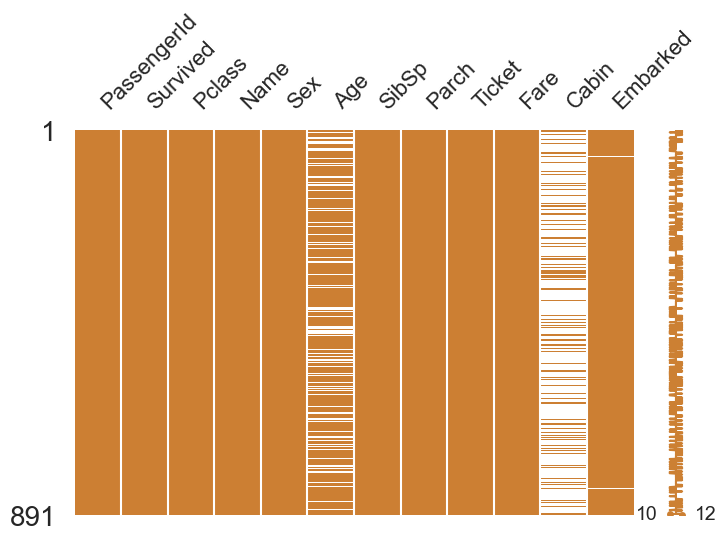

In [42]:
msno.matrix(df=df_train, figsize=(8,5), color=(0.8,0.5,0.2))

<AxesSubplot:>

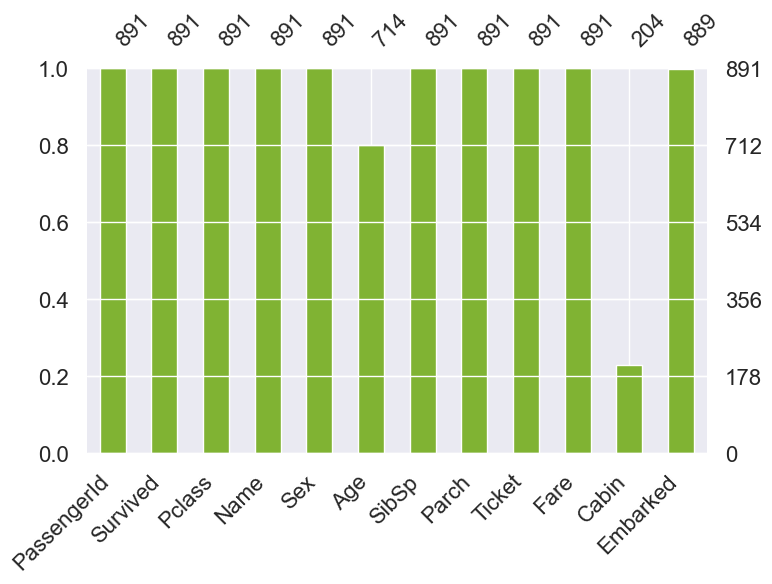

In [41]:
msno.bar(df=df_train, figsize=(8,5), color=(0.5,0.7,0.2))

# Target Label이 편향되지 않았는지 분포를 확인하기

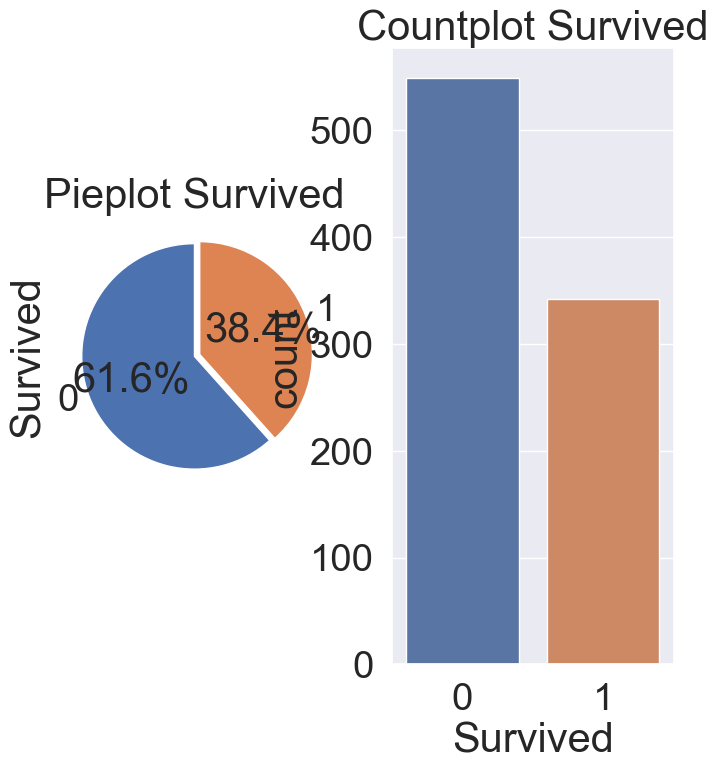

In [77]:
f,ax = plt.subplots(1,2,figsize=(8,8))

df_train['Survived'].value_counts().plot.pie(explode=(0,0.05),autopct='%1.1f%%',ax=ax[0],shadow=False,startangle=90)
ax[0].set_title('Pieplot Survived')
# ax[0].set_label(['Dead','Survived'])
ax[0].set_label('')

sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Countplot Survived')

plt.show()

# EDA - Pclass

In [95]:
# print(df_train.groupby('Pclass',as_index=True).count()['Survived'])
# print(df_train.groupby('Pclass',as_index=True).sum()['Survived'])
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')
# df_train.groupby('Pclass',as_index=).count()['Survived'].plot.bar()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

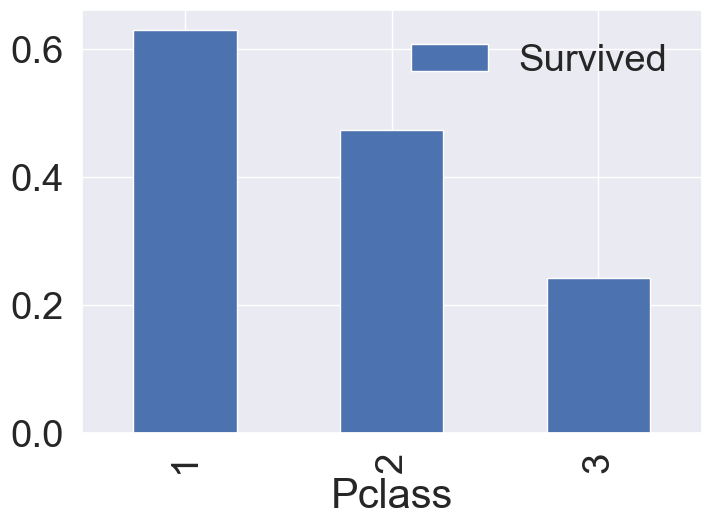

In [101]:
df_train[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False) .plot.bar()

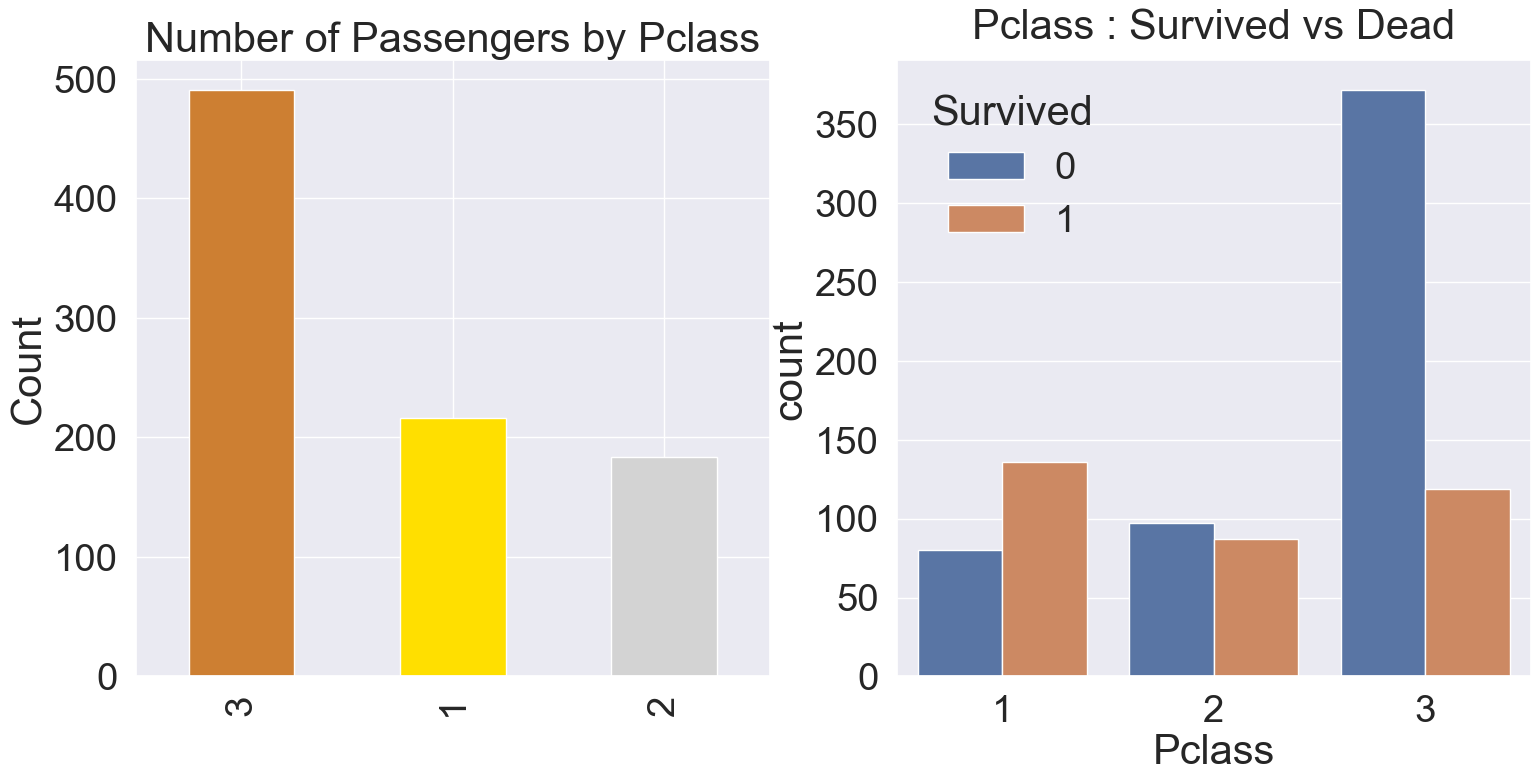

In [113]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',data=df_train,hue='Survived',ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=1.02) # 타이틀의 y축 위치를 지정해줌. 옆 그래프에 비해 살짝 높이 있는걸 확인할 수 있음
plt.show()

# EDA - Sex

Text(0.5, 1.0, 'Sex : Survived vs Dead')

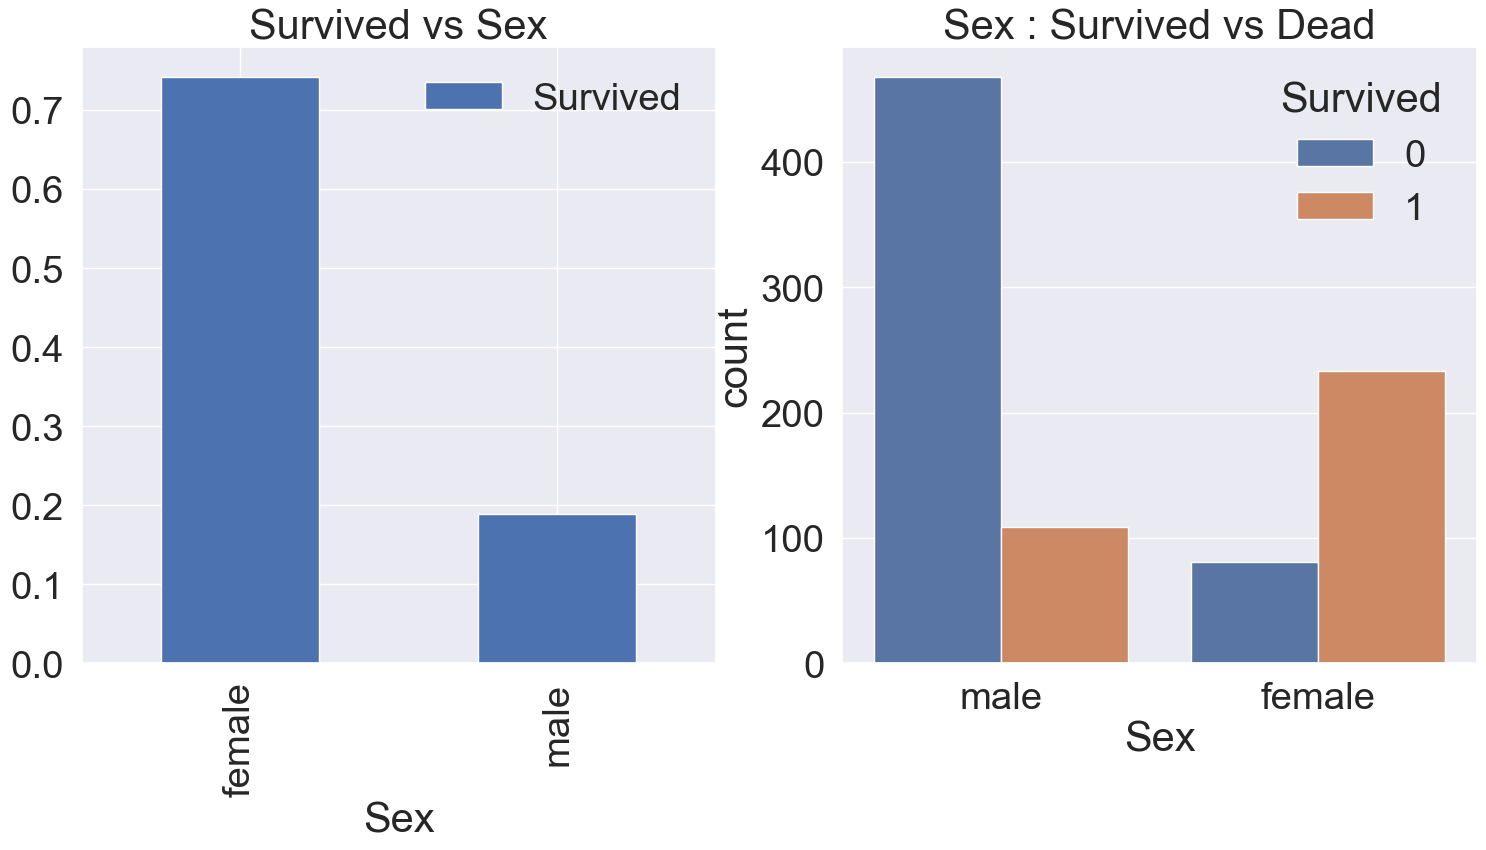

In [120]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby('Sex',as_index=True).mean().plot.bar(ax=ax[0])# .plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',data=df_train,hue='Survived',ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

In [127]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


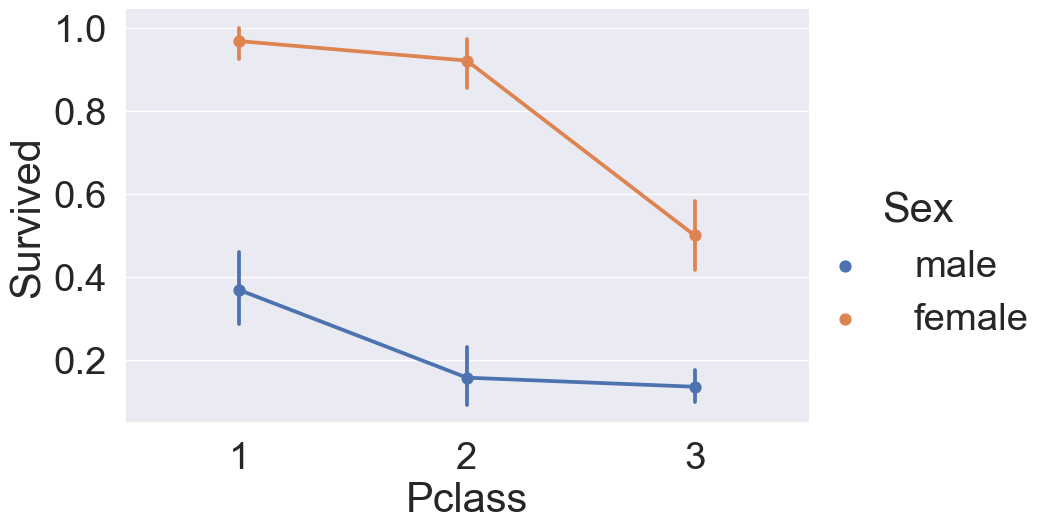

In [171]:
sns.factorplot('Pclass','Survived',data=df_train,hue='Sex',size=6,aspect=1.5)

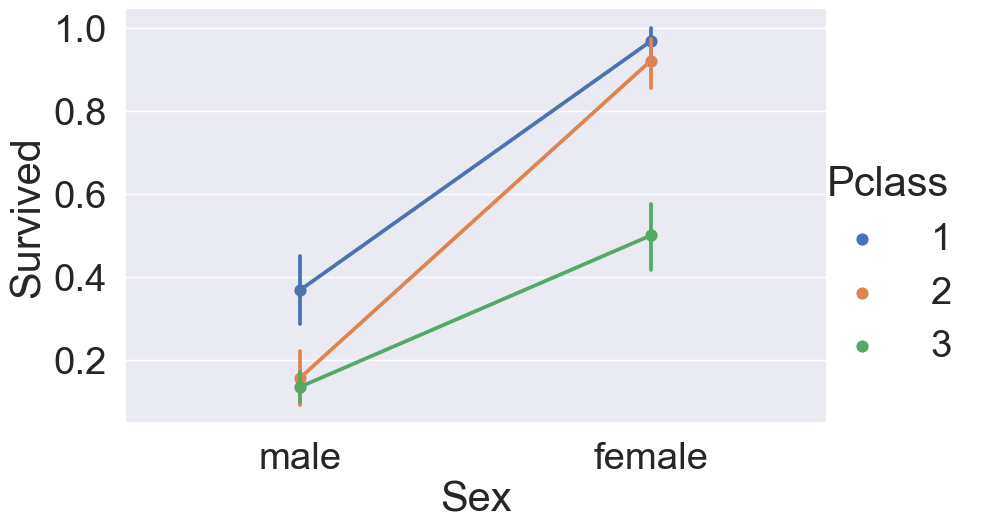

In [177]:
sns.catplot('Sex','Survived',data=df_train,hue='Pclass',kind='point',size=6,aspect=1.5,saturation=100)

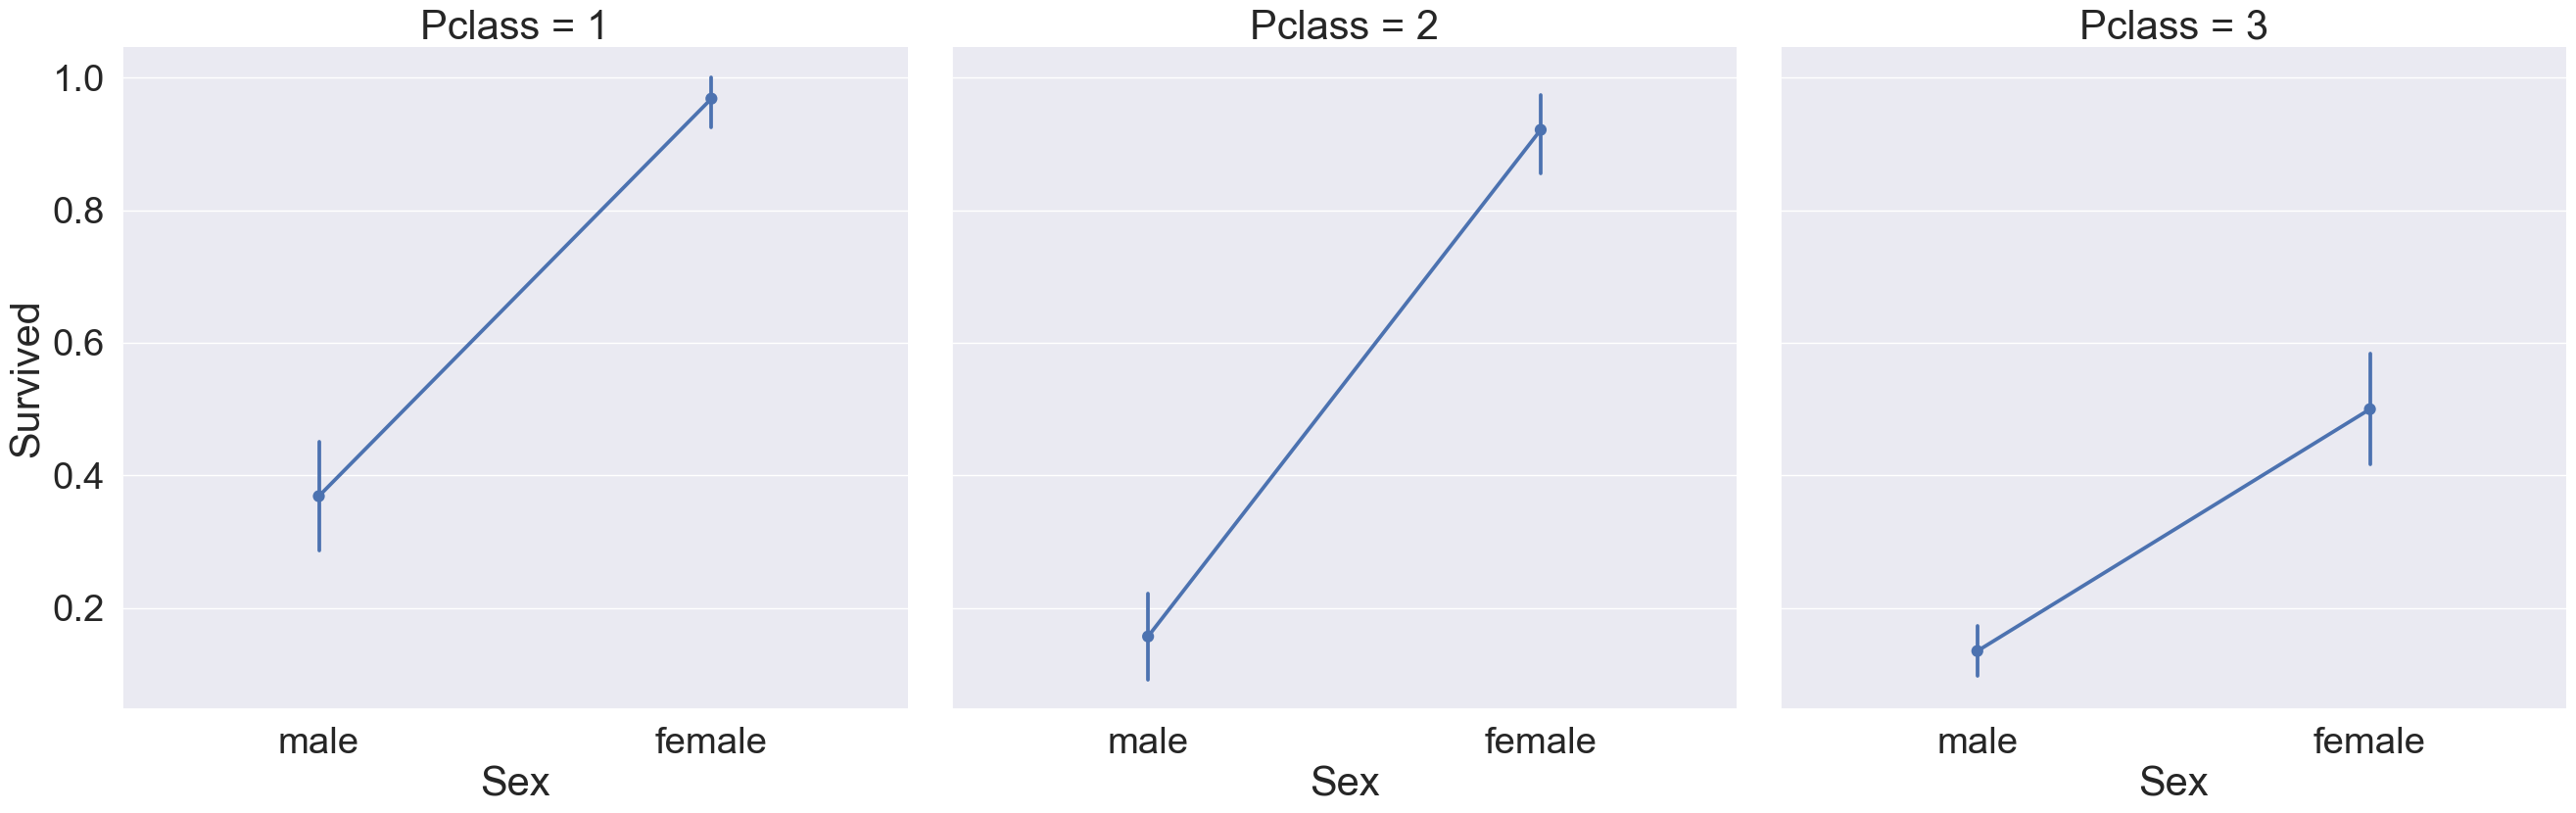

In [182]:
sns.factorplot('Sex','Survived',data=df_train,col='Pclass',aspect=1,saturation=5,size=9)

# EDA - Age

In [21]:
print('최연장자 : {0:.0f}세'.format(df_train['Age'].max()))
print('최연소자 : {0:.0f}세'.format(df_train['Age'].min()))
print('평균나이 : {0:.0f}세'.format(df_train['Age'].mean()))

최연장자 : 80세
최연소자 : 0세
평균나이 : 30세


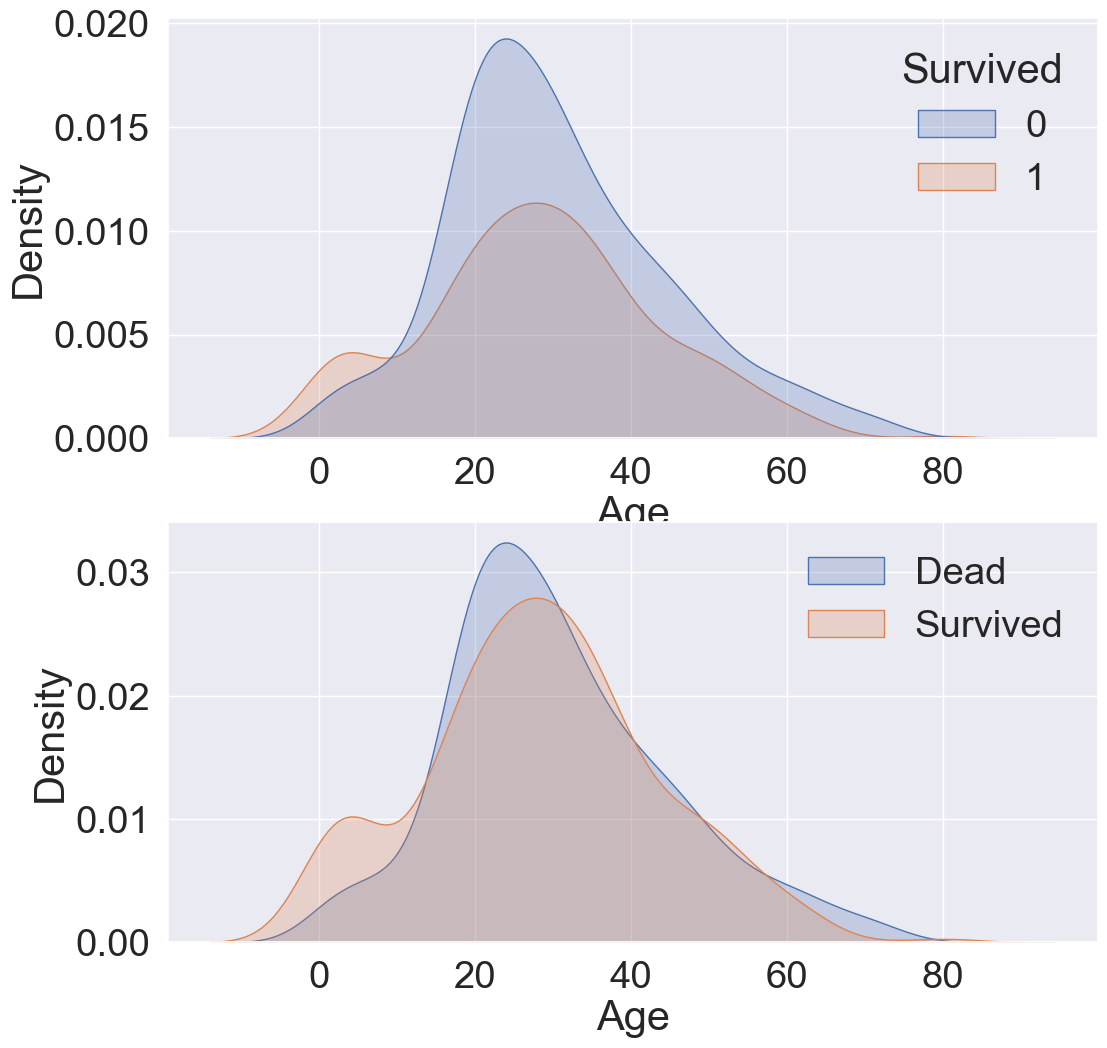

In [37]:
f,ax = plt.subplots(2,1,figsize=(12,12))
sns.kdeplot('Age',data=df_train,hue='Survived',ax=ax[0],shade=True)

sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax[1],shade=True)
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax[1],shade=True)
plt.legend(['Dead','Survived'])
plt.show()

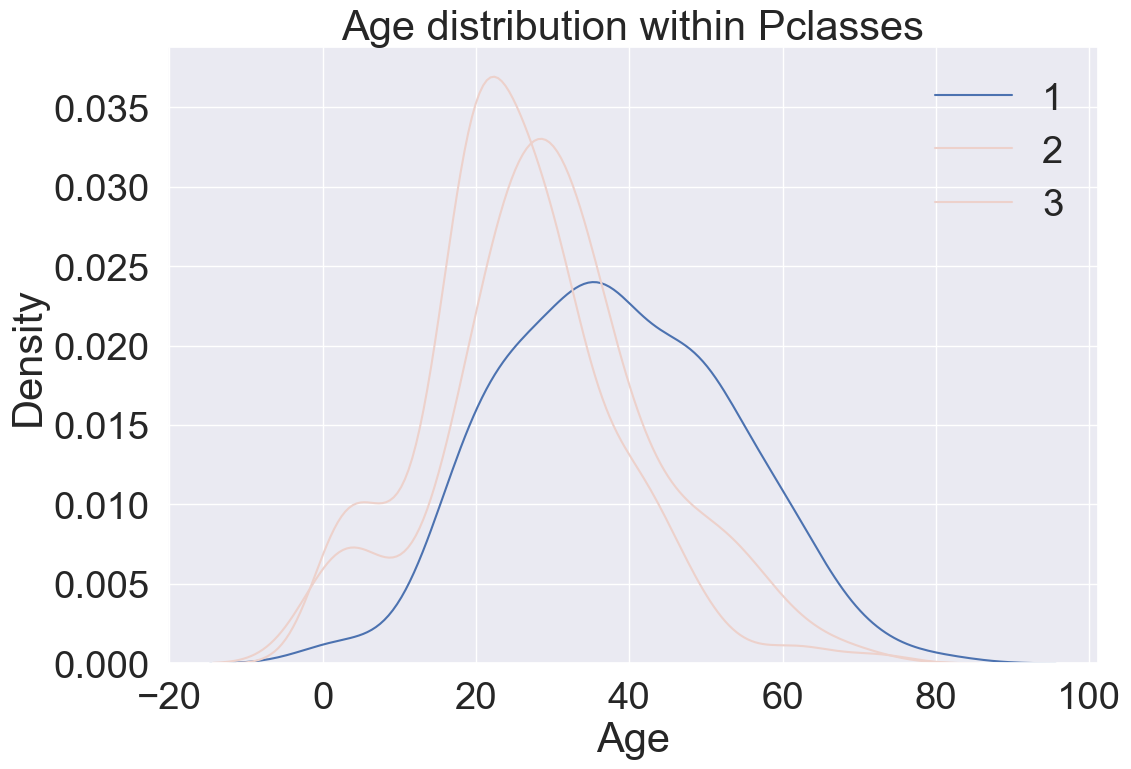

In [45]:
f,ax = plt.subplots(1,1,figsize=(12,8))
for pclass in range(1,4) :
    sns.kdeplot('Age',data=df_train[df_train['Pclass']==pclass],hue='Pclass',ax=ax)
ax.set_title('Age distribution within Pclasses')
plt.legend([1,2,3])
plt.show()

# EDA - Embarked

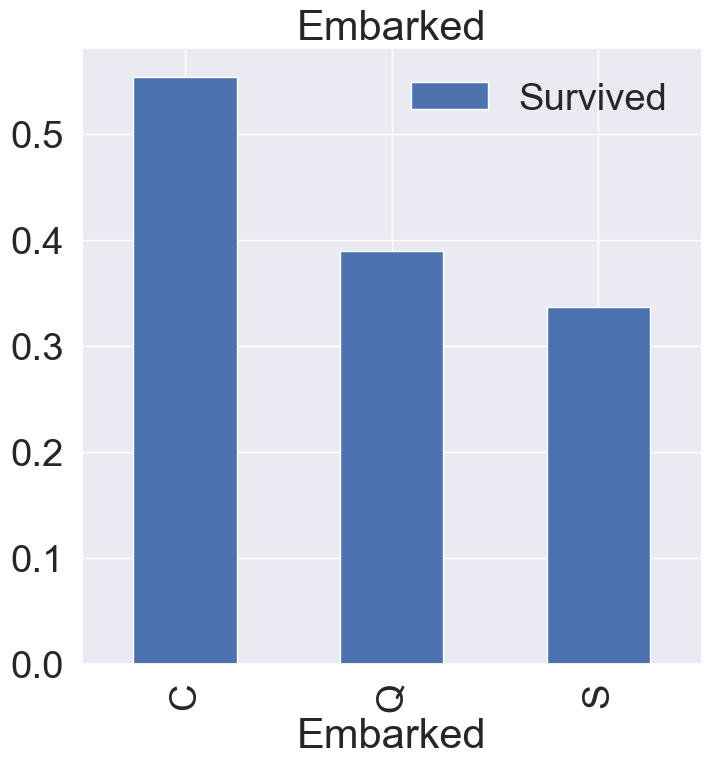

In [51]:
f,ax = plt.subplots(1,1,figsize=(8,8))
df_train[['Embarked','Survived']].groupby('Embarked').mean().plot.bar(ax=ax)
ax.set_title('Embarked')
plt.show()

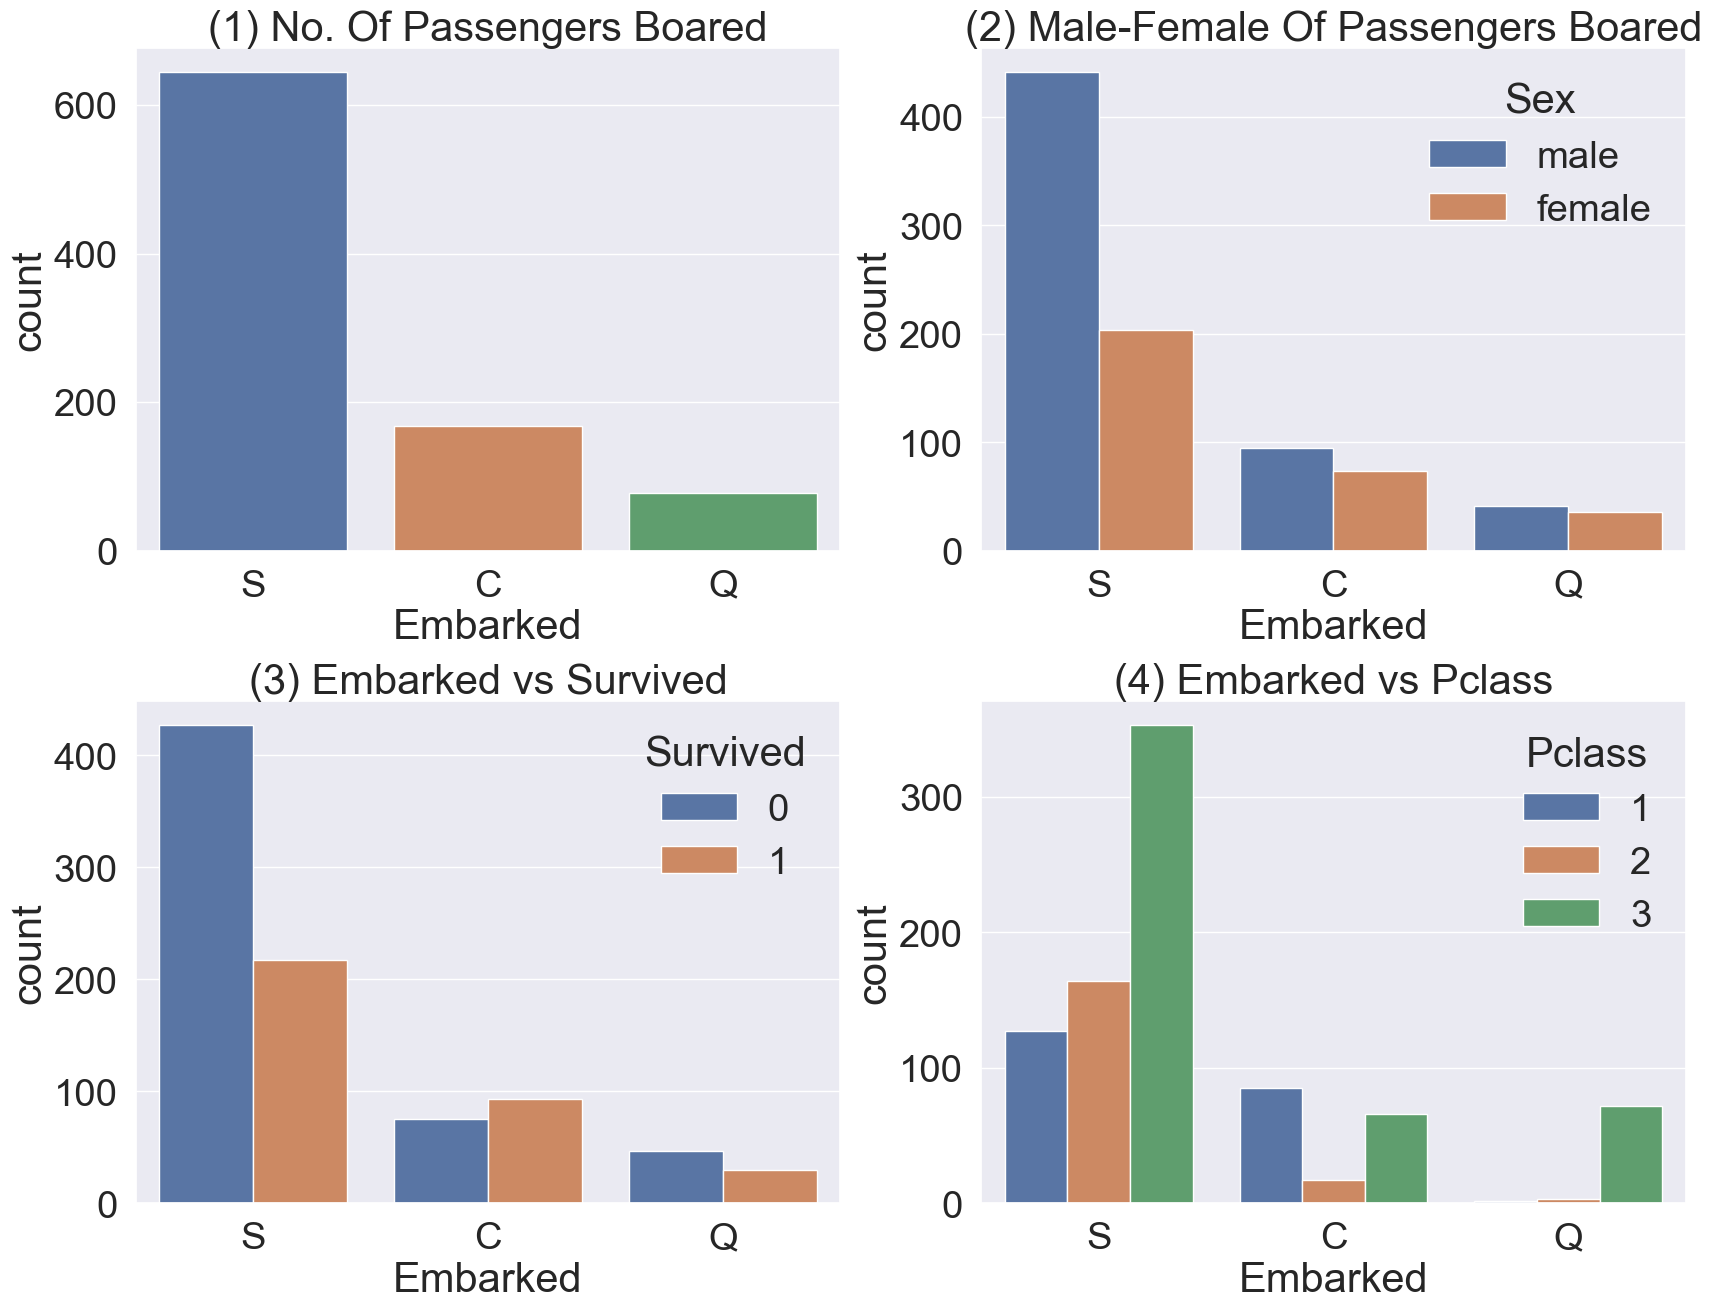

In [61]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked',data=df_train,hue='Sex',ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Of Passengers Boared')

sns.countplot('Embarked',data=df_train,hue='Survived',ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',data=df_train,hue='Pclass',ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

# EDA - Family(SibSp + Parch)

In [64]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [66]:
print('Maximum of Family Size : {}'.format(df_train['FamilySize'].max()))
print('Minimum of Family Size : {}'.format(df_train['FamilySize'].min()))

Maximum of Family Size : 11
Minimum of Family Size : 1


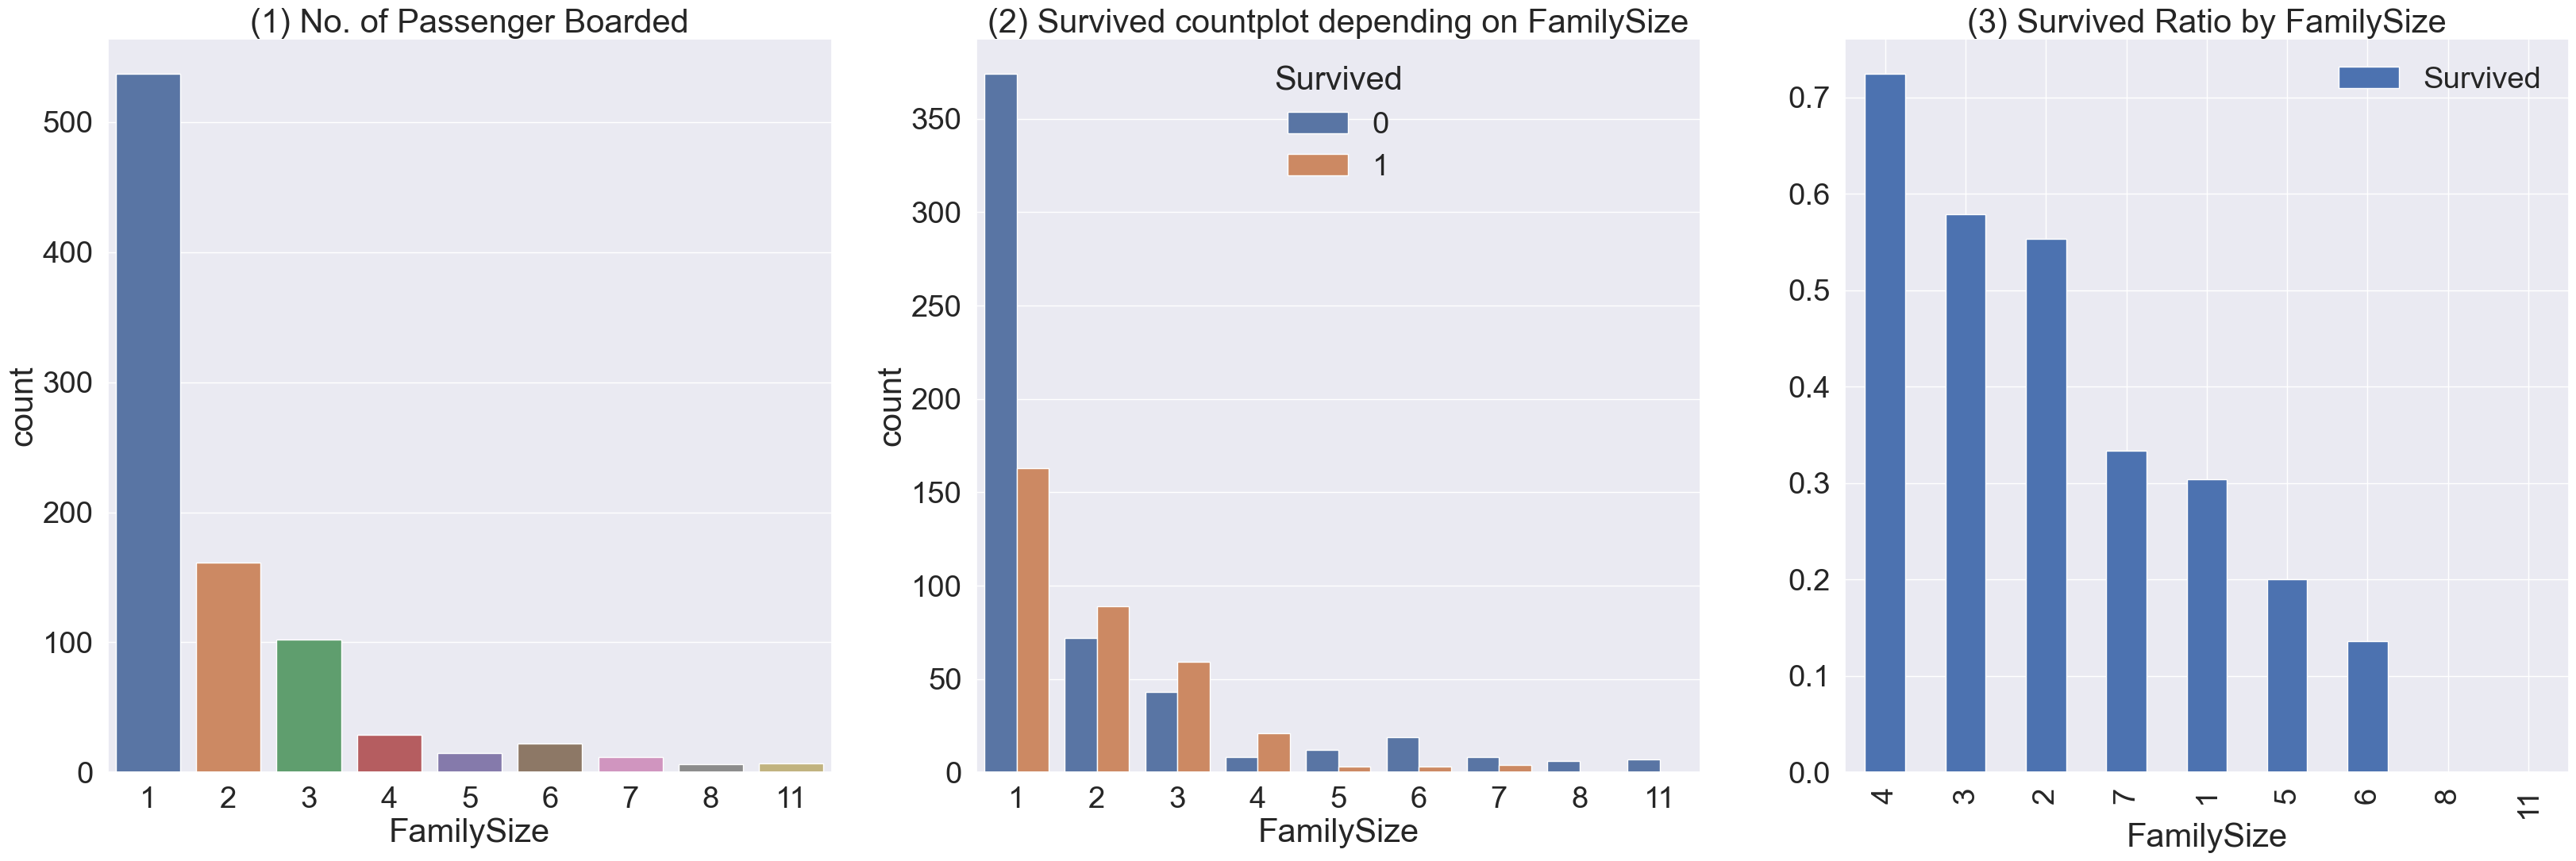

In [79]:
f,ax = plt.subplots(1,3,figsize=(40,12))

sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boarded')
sns.countplot('FamilySize',data=df_train,hue='Survived',ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')
df_train[['FamilySize','Survived']].groupby('FamilySize').mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived Ratio by FamilySize')

plt.subplots_adjust(wspace=0.2)

# EDA - Fare, Cabin, Ticket

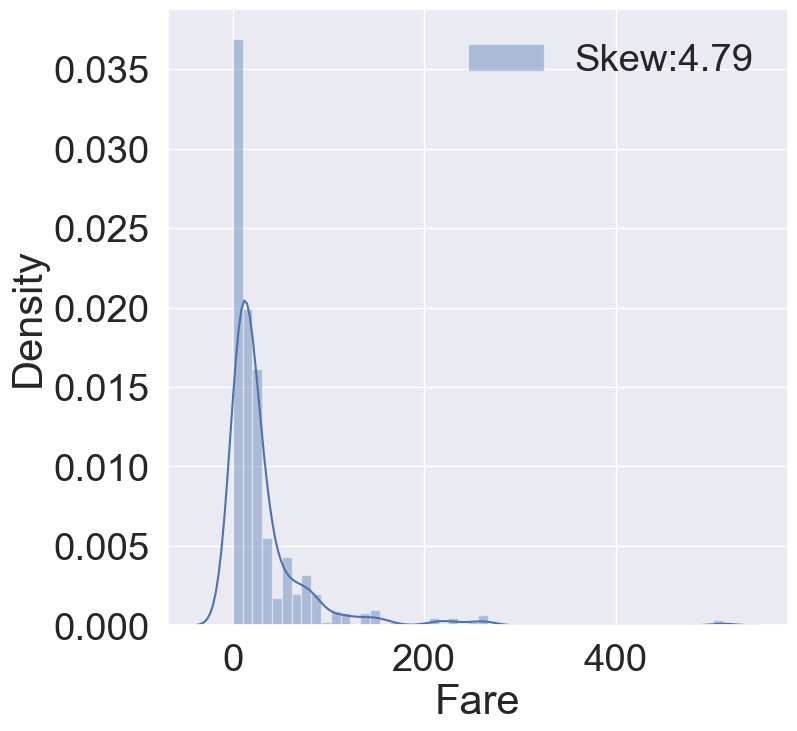

In [100]:
f,ax = plt.subplots(1,1,figsize=(8,8))
graph = sns.distplot(df_train['Fare'],color='b',label='Skew:{:.2f}'.format(df_train["Fare"].skew()),ax=ax) # ,data=df_train
graph = graph.legend(loc='best')
plt.show()

In [ ]:
print(df_train['Fare'])
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
print(df_train['Fare'])

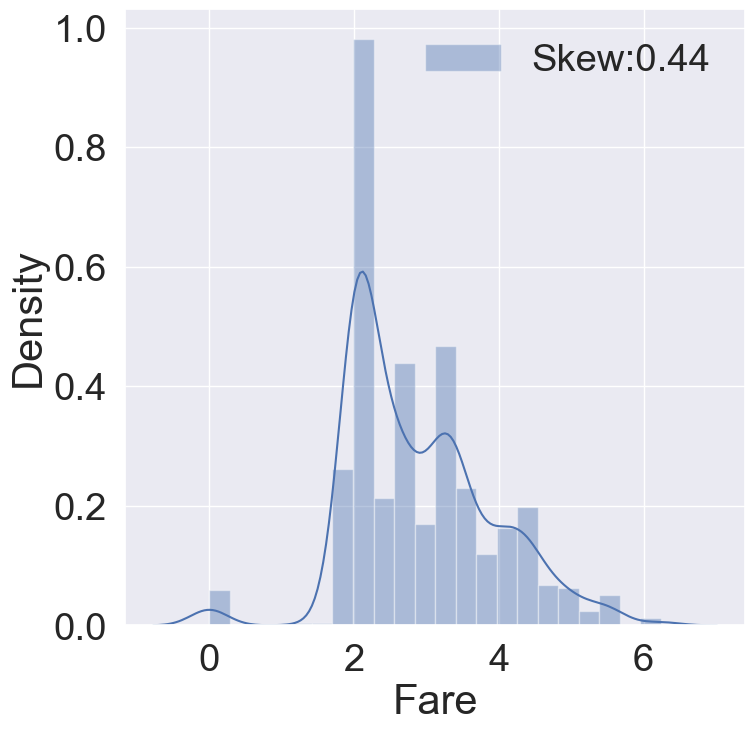

In [106]:
f,ax = plt.subplots(1,1,figsize=(8,8))
graph = sns.distplot(df_train['Fare'],color='b',label='Skew:{:.2f}'.format(df_train["Fare"].skew()),ax=ax) # ,data=df_train
graph = graph.legend(loc='best')
plt.show()

In [108]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64